# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


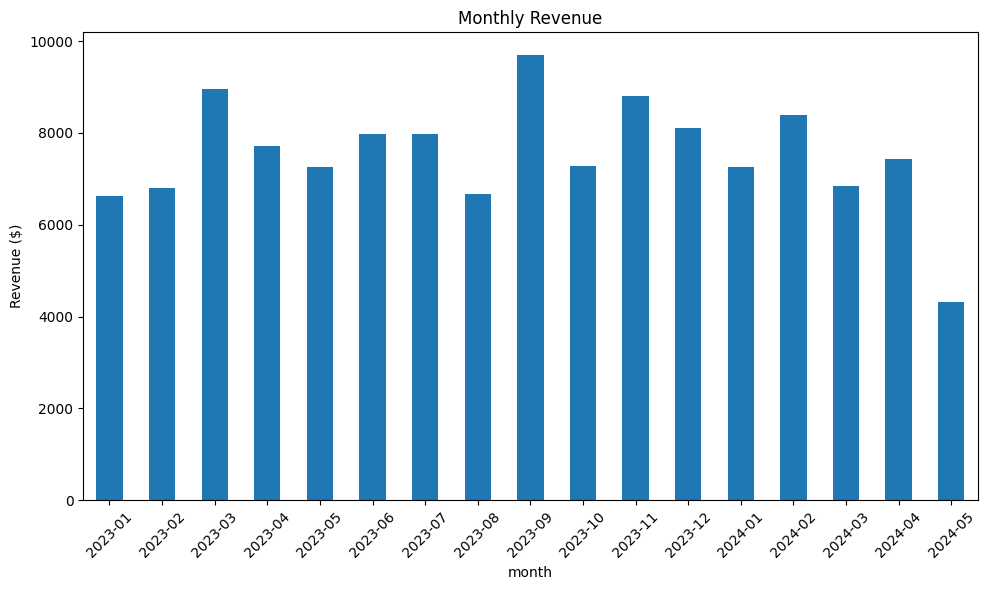

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

In [4]:
# Make a copy of the data:
data_copy = data.copy()

# Time range of the dataset
print("Date range:", data_copy['order_date'].min(), "to", data_copy['order_date'].max())

# Quarter Range
data_copy['quarter'] = data_copy['order_date'].dt.to_period('Q')

# Revenue by quarter
quarterly_revenue = data_copy.groupby('quarter')['revenue'].sum()
latest_quarter = data_copy['quarter'].max()
last_completed_quarter = latest_quarter - 1
last_quarter_revenue = quarterly_revenue.loc[last_completed_quarter]
print(f"Quarterly Revenue for {last_completed_quarter}:")
print("Total Revenue: $", last_quarter_revenue)

# Filter data for the last completed quarter
last_quarter_data = data_copy[data_copy['quarter'] == last_completed_quarter]

# Revenue by month in the last completed quarter
monthly_revenue_last_quarter = last_quarter_data.groupby('month')['revenue'].sum()
print("\nMonthly Revenue in the last completed quarter:")
print(monthly_revenue_last_quarter)


Date range: 2023-01-01 00:00:00 to 2024-05-14 00:00:00
Quarterly Revenue for 2024Q1:
Total Revenue: $ 22493.23

Monthly Revenue in the last completed quarter:
month
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
Freq: M, Name: revenue, dtype: float64


### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

In [5]:
# Total revenue by customer
customer_revenue = data_copy.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
top_5_customers = customer_revenue.head(5)
print("Top 5 Customers by Revenue:")    
print(top_5_customers)


Top 5 Customers by Revenue:
customer_id
62    4448.39
24    3369.44
90    2976.78
92    2838.74
97    2835.62
Name: revenue, dtype: float64


### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

In [6]:
# Average revenue per customer segment
avg_revenue_per_segment = data_copy.groupby('customer_segment')['revenue'].mean().sort_values(ascending=False)
print("Average Revenue per Customer Segment:")
print(avg_revenue_per_segment)

Average Revenue per Customer Segment:
customer_segment
Senior          262.133925
Professional    255.652674
Student         253.812087
Name: revenue, dtype: float64


### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

In [7]:
# Total revenue by region
total_revenue_by_region = data_copy.groupby('region')['revenue'].sum().sort_values(ascending=False)
print("Region with highest total revenue:", total_revenue_by_region.idxmax())

# Region with highest average order size
avg_order_size_by_region = data_copy.groupby('region')['quantity'].mean().sort_values(ascending=False)
print("Region with highest average order size:", avg_order_size_by_region.idxmax())


Region with highest total revenue: South
Region with highest average order size: West


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?




In [20]:

popular_by_quantity = data_copy.groupby('product_category')['quantity'].sum().sort_values(ascending=False)
print("Most popular by quantity:", popular_by_quantity.idxmax())

popular_by_revenue = data_copy.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
print("Most popular by revenue:", popular_by_revenue.idxmax())


Most popular by quantity: Home
Most popular by revenue: Home


### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

Average Revenue per Order by Discount Percentage:
discount_applied
0     248.296337
5     266.914237
10    264.531364
15    283.809796
20    215.790000
25    301.361000
30    245.007727
Name: revenue, dtype: float64


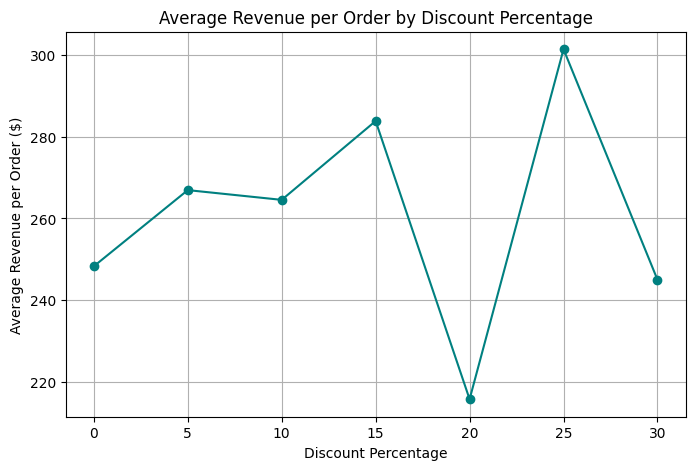

On Average, orders with No Discount applied generate the highest revenue.


In [9]:
# Average revenue by discount applied
avg_revenue_by_discount = data_copy.groupby('discount_applied')['revenue'].mean().sort_index()
print("Average Revenue per Order by Discount Percentage:")
print(avg_revenue_by_discount)

# Plot
plt.figure(figsize=(8,5))
plt.plot(avg_revenue_by_discount.index, avg_revenue_by_discount.values, marker='o', linestyle='-', color='teal')
plt.title("Average Revenue per Order by Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Average Revenue per Order ($)")
plt.xticks(avg_revenue_by_discount.index) 
plt.grid(True)
plt.show()

print("On Average, orders with No Discount applied generate the highest revenue.")


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

In [10]:
payment_percent = data_copy['payment_method'].value_counts(normalize=True) * 100
print("Percentage of Orders by Payment Method (%):")
print(payment_percent)

avg_revenue_by_payment = data_copy.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)
print("\nAverage Revenue per Order by Payment Method:")
print(avg_revenue_by_payment)

print(f"\n- Most commonly used payment method: Credit Card ({payment_percent['Credit Card']:.1f}% of orders)\n"
      f"- Payment method with highest average revenue per order: Debit Card (${avg_revenue_by_payment['Debit Card']:.2f})")


Percentage of Orders by Payment Method (%):
payment_method
Credit Card    27.4
Gift Card      24.8
Debit Card     24.6
PayPal         23.2
Name: proportion, dtype: float64

Average Revenue per Order by Payment Method:
payment_method
Debit Card     275.980650
Credit Card    257.444234
Gift Card      254.362500
PayPal         236.071034
Name: revenue, dtype: float64

- Most commonly used payment method: Credit Card (27.4% of orders)
- Payment method with highest average revenue per order: Debit Card ($275.98)


### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

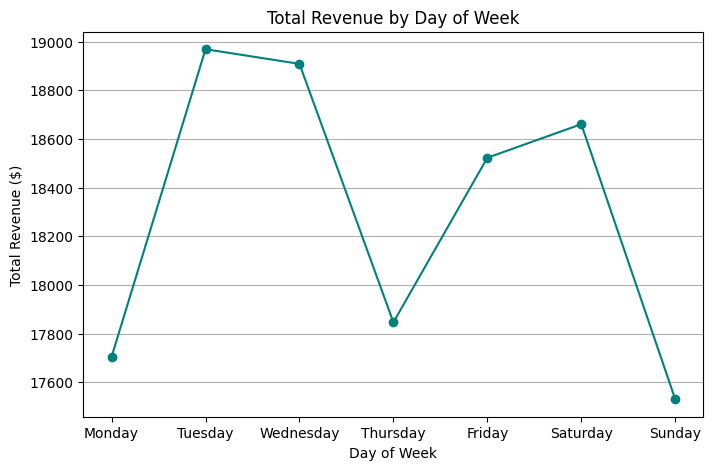

In [18]:
# Order the days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate revenue by day of week
revenue_by_day = data_copy.groupby('day_of_week')['revenue'].sum().reindex(days_order)

# Plot
plt.figure(figsize=(8,5))
revenue_by_day.plot(kind='line', color='teal', marker='o')
plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y')
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

In [19]:
# Your code here

# Calculate profit per order
data_copy['profit'] = data_copy['revenue'] * 0.2

# Total profit
total_profit = data_copy['profit'].sum()
print(f"Estimated Total Profit: ${total_profit:.2f}")

# Profit by region
profit_by_region = data_copy.groupby('region')['profit'].sum().sort_values(ascending=False)
print("\nProfit by Region:")
print(profit_by_region)

# Most profitable region
most_profitable_region = profit_by_region.idxmax()
print(f"\nMost Profitable Region: {most_profitable_region}")


Estimated Total Profit: $25628.13

Profit by Region:
region
South    6967.890
North    6870.338
East     6244.360
West     5545.546
Name: profit, dtype: float64

Most Profitable Region: South


### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

## Key Insights

- 2024Q1 revenue: $22,493; February is the strongest month.  
- Seniors are the highest-spending customer segment.  
- Top 5 customers drive significant revenue; consider loyalty programs.  
- South region is most profitable; West has the highest average order size.  
- Home products lead in both quantity and revenue.  
- Discounts have mixed impact; use strategic high-value discounts.  
- Credit Card is the most used payment method; Debit Card orders have the highest average revenue.  
- Tuesdays and Wednesdays generate the most revenue.  

## Executive Summary

**Overall, focusing marketing, inventory, and promotions on high-performing customers, regions, days, and products can maximize revenue and profit.**



---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.